# Data Understanding

## Import Library

In [1625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler,MinMaxScaler
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Load Data

In [1626]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regresi _Linier_Yandex/train_sample.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regresi _Linier_Yandex/test_sample.csv')

In [1627]:
df = df_train.copy()
df2 = df_test.copy()
df.head(5)

,sold_date,sold_price,year_built,garage,sqft,type,price,transport,services,beds,floors,baths,lot_sqft
0,2005-05-16,46.480370,1966.0,1.0,320.000000,condos,45.503842,False,5,2.0,31.0,1.0,NaN
1,NaN,NaN,2013.0,1.0,NaN,condos,66.400062,False,2,2.0,16.0,2.0,NaN
2,2005-06-17,59.103574,1935.0,2.0,644.000000,single_family,120.926742,True,5,4.0,2.0,3.0,1599.0
3,NaN,NaN,1922.0,NaN,NaN,condos,48.237728,False,2,2.0,3.0,2.0,NaN
4,2000-03-13,11.283478,1961.0,NaN,266.666667,condos,27.813441,False,5,1.0,8.0,1.0,NaN


## Check Data Info

In [1628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_date   1136 non-null   object 
 1   sold_price  1136 non-null   float64
 2   year_built  1433 non-null   float64
 3   garage      1023 non-null   float64
 4   sqft        1150 non-null   float64
 5   type        1600 non-null   object 
 6   price       1594 non-null   float64
 7   transport   1600 non-null   bool   
 8   services    1600 non-null   int64  
 9   beds        1550 non-null   float64
 10  floors      1303 non-null   float64
 11  baths       1599 non-null   float64
 12  lot_sqft    792 non-null    float64
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 151.7+ KB


In [1629]:
df.describe()

,sold_price,year_built,garage,sqft,price,services,beds,floors,baths,lot_sqft
count,1136.000000,1433.000000,1023.000000,1150.000000,1594.000000,1600.000000,1550.000000,1303.000000,1599.000000,792.000000
mean,66.321839,1943.490579,2.160313,693.690145,111.498879,3.178750,3.294194,7.185725,2.442777,2511.638468
std,104.167345,39.403958,12.515107,588.244993,232.552532,1.501069,1.769450,13.083246,1.491006,25515.203842
min,0.649330,1853.000000,1.000000,151.333333,0.071187,1.000000,0.000000,1.000000,0.000000,0.333333
25%,20.358466,1913.000000,1.000000,385.916667,40.916142,2.000000,2.000000,2.000000,2.000000,1041.666667
50%,40.562374,1941.000000,2.000000,515.666667,63.647552,2.000000,3.000000,2.000000,2.000000,1250.000000
75%,72.750024,1968.000000,2.000000,769.166667,104.594288,5.000000,4.000000,4.000000,3.000000,1666.750000
max,1254.561061,2021.000000,400.000000,8333.333333,4272.739470,5.000000,21.000000,119.000000,13.000000,718666.666667


# Check Duplicated Data

In [1630]:
df.duplicated().sum()

np.int64(0)

##Data Cleaning Column YEAR built

In [1631]:
from datetime import datetime

current_year = datetime.now().year

df['year_built'] = (current_year - df['year_built'])
df2['year_built'] = (current_year - df2['year_built'])
print(df['year_built'].head(3))

0    59.0
1    12.0
2    90.0
Name: year_built, dtype: float64


#Drop Kolom Yang tidak digunakan

In [1632]:
df.drop(['sold_date','sold_price'], axis = 1, inplace = True)
df2.drop(['sold_date','sold_price'], axis = 1, inplace = True)

# EDA

## Check Corelation

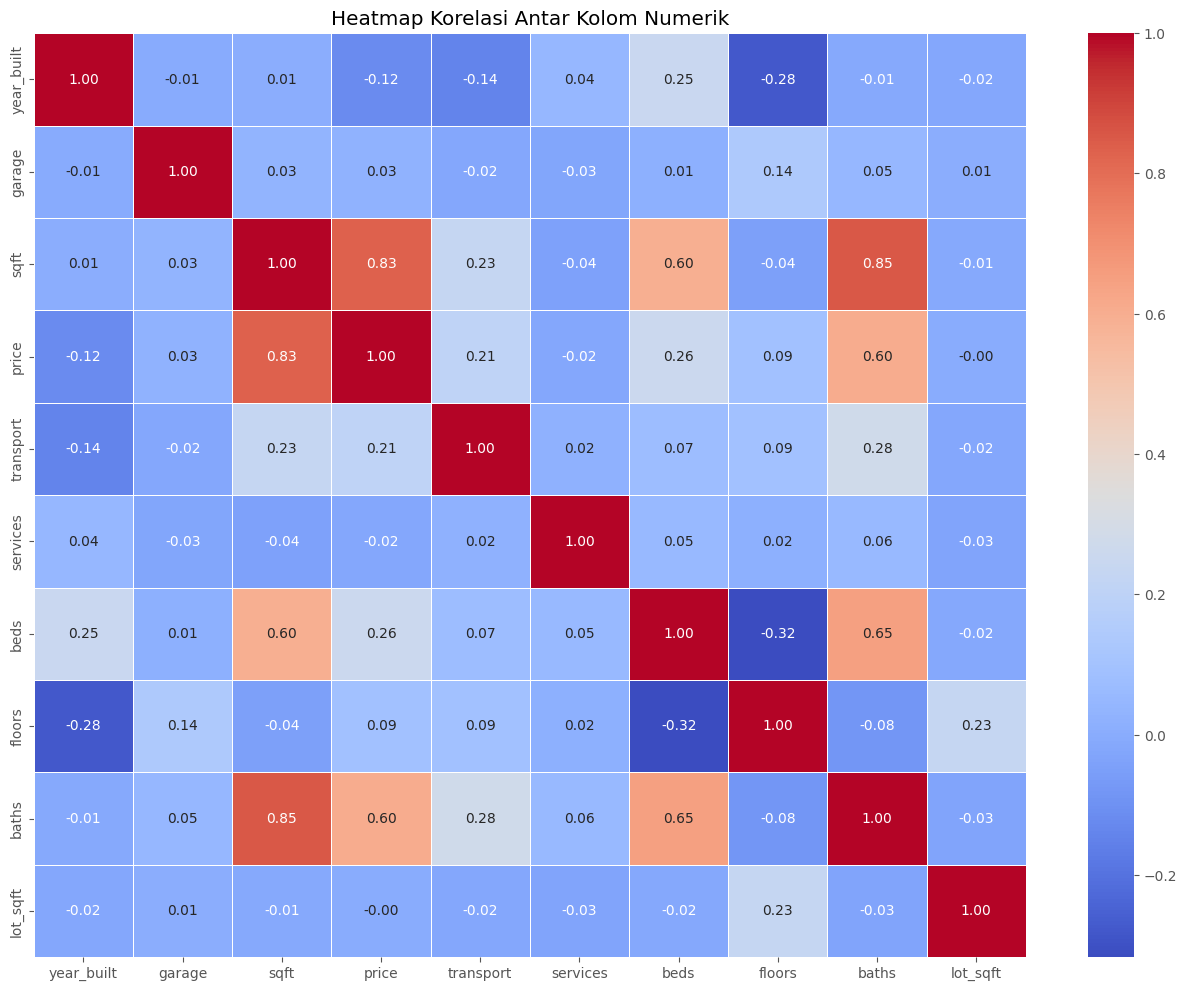

In [1633]:
df_numeric = df.select_dtypes(exclude='object')

korelasi_matrix = df_numeric.corr()


plt.figure(figsize=(16, 12))
sns.heatmap(
    korelasi_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)

plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()

## Cardinality

In [1634]:
print(df.select_dtypes(include='object').nunique())

type    7
dtype: int64


In [1635]:
df['type'].value_counts()

,count
type,
single_family,741
condos,574
multi_family,169
townhomes,63
land,50
mobile,2
apartment,1


In [1636]:
print(df.select_dtypes(exclude='object').nunique())

year_built     146
garage           9
sqft           576
price         1594
transport        2
services         4
beds            14
floors          60
baths           13
lot_sqft       368
dtype: int64


## Univariate Analysis

### Category Data

Index(['type'], dtype='object')


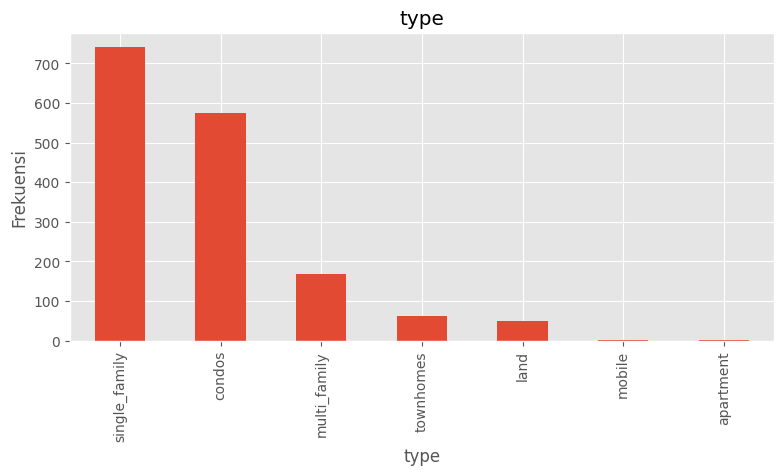

In [1637]:
cat_var = df.select_dtypes(include='object').columns
print(cat_var)

plt.style.use("ggplot")

for column in cat_var:
  plt.figure(figsize = (20,4))
  plt.subplot(1, 2, 1)
  df[column].value_counts().plot(kind="bar")
  plt.xlabel(column)
  plt.ylabel("Frekuensi")
  plt.title(column)
  plt.show()

### Numerical Data

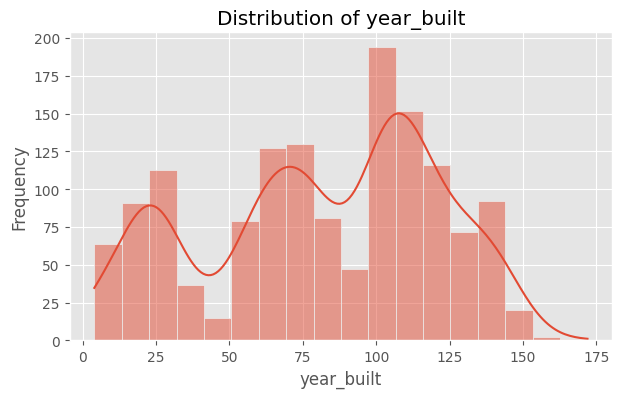

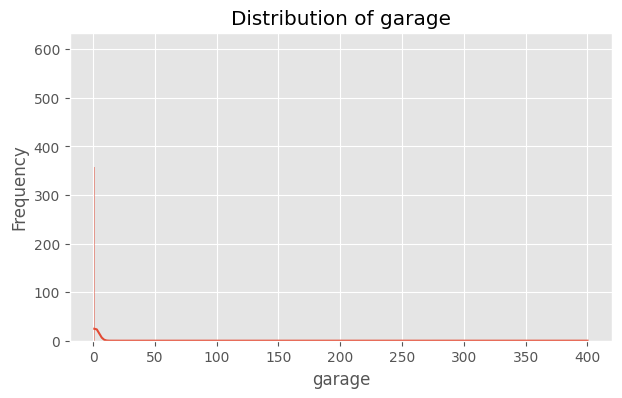

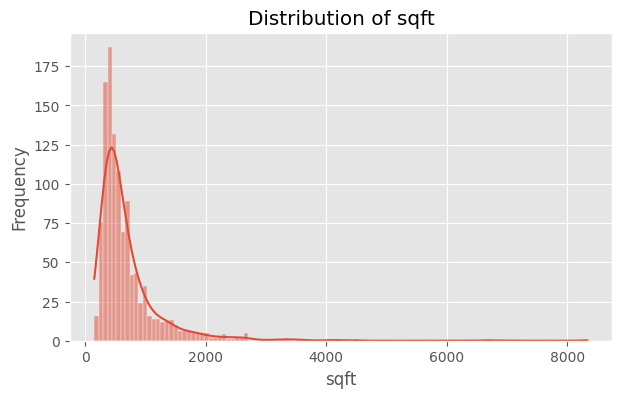

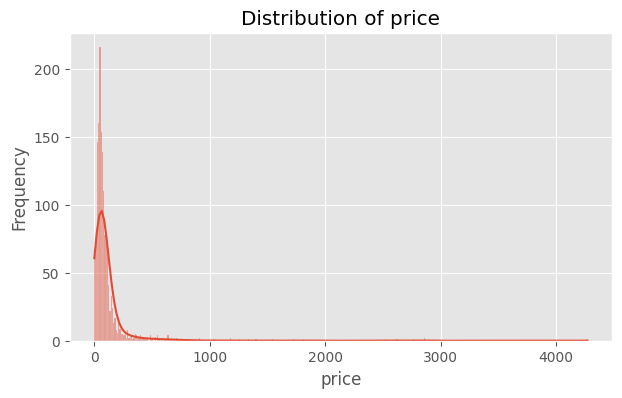

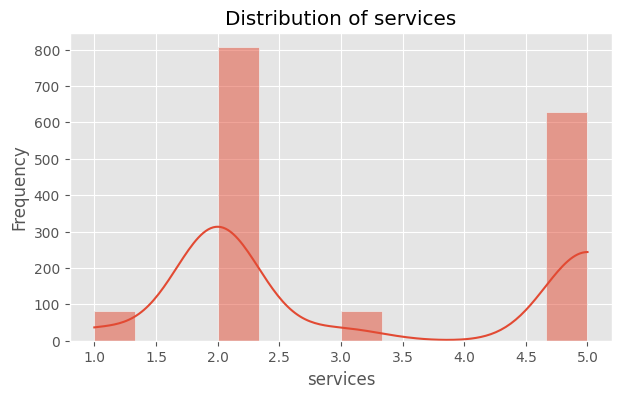

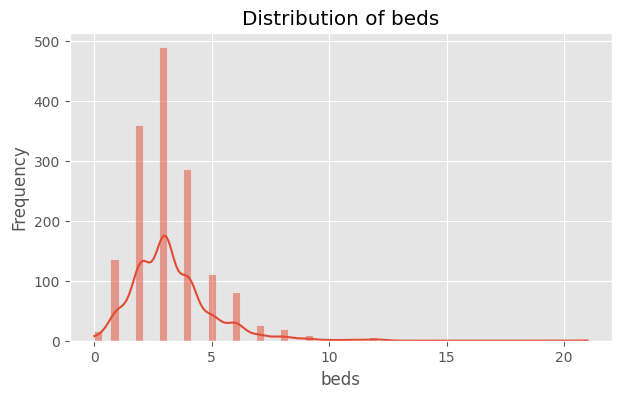

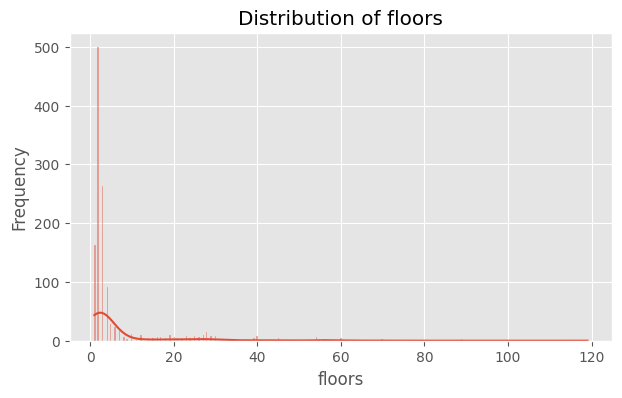

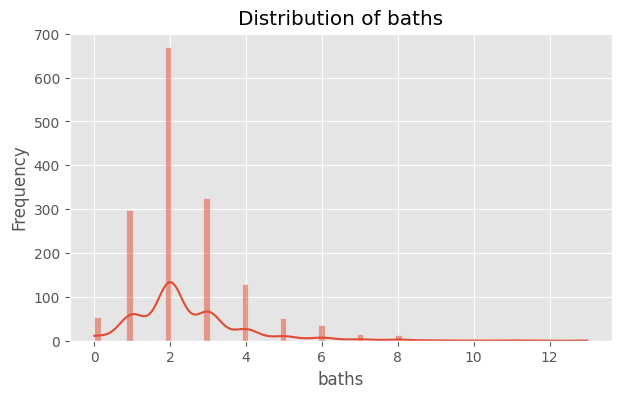

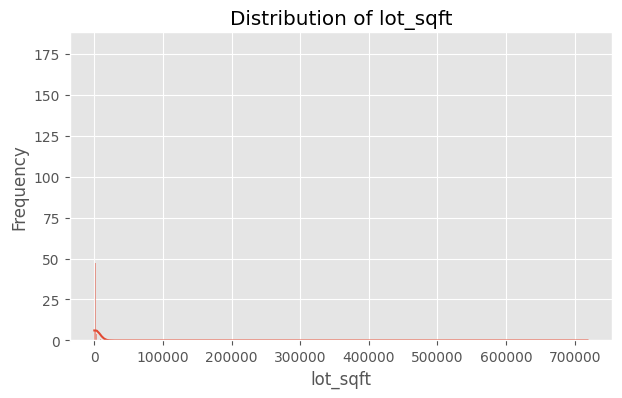

In [1638]:
# Automatically plot distributions for all numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot each distribution
for col in numeric_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

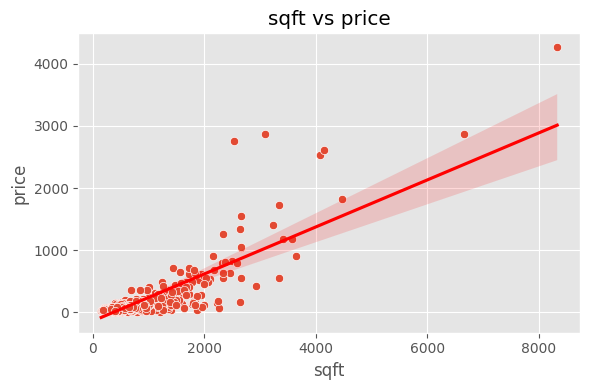

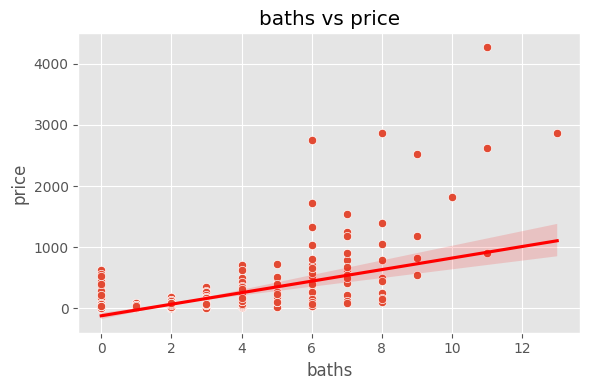

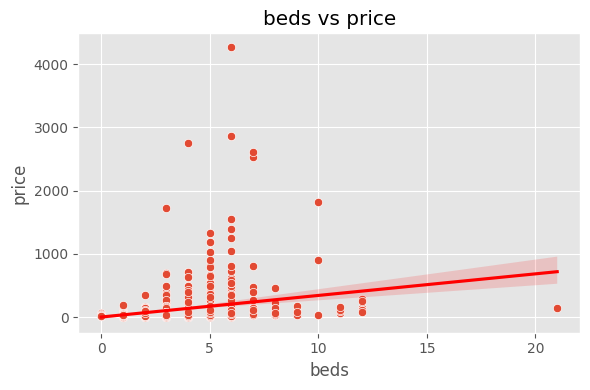

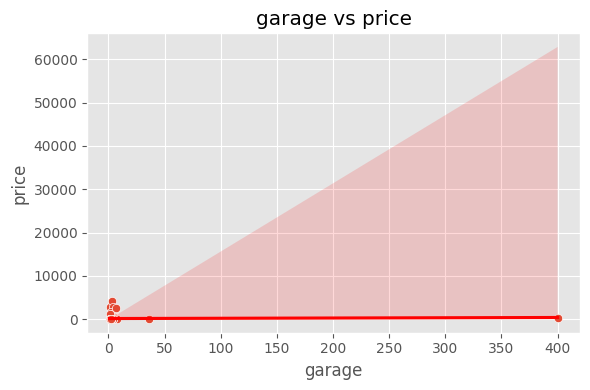

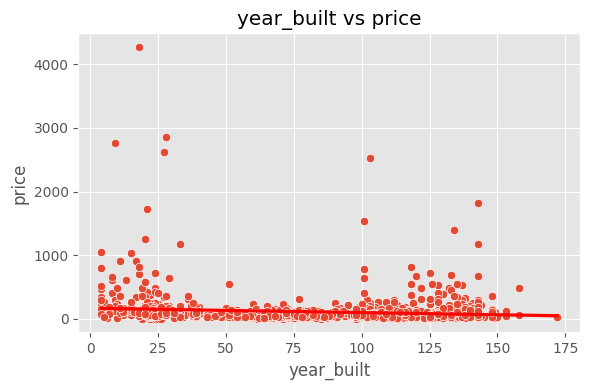

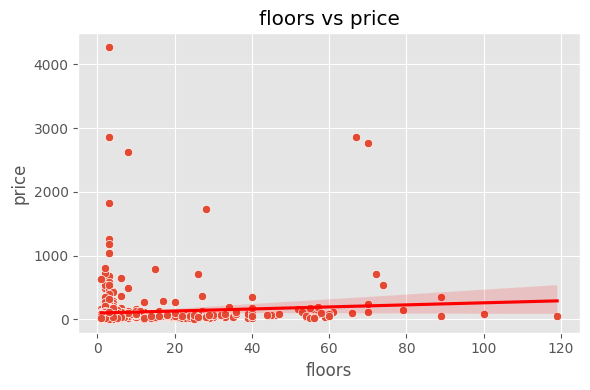

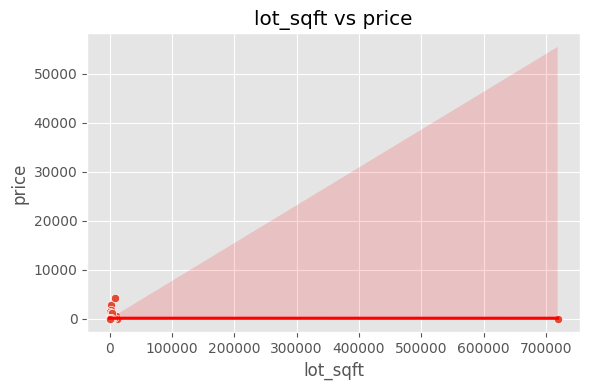

In [1639]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['sqft', 'baths', 'beds', 'garage', 'year_built', 'floors', 'lot_sqft']
target = 'price'

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df[target])
    sns.regplot(x=df[feature], y=df[target], scatter=False, color='red')  # garis regresi
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


# Preprocessing

## Handling Missing Value

### Check missing value

In [1640]:
missing_value = df.isnull().sum() * 100 / df.shape[0]

print(missing_value)

year_built    10.4375
garage        36.0625
sqft          28.1250
type           0.0000
price          0.3750
transport      0.0000
services       0.0000
beds           3.1250
floors        18.5625
baths          0.0625
lot_sqft      50.5000
dtype: float64


In [1641]:
df.shape

(1600, 11)

### Data Drop
Menghapus lot_sqft karena memiliki 50% missing value

In [1642]:
df.drop(['lot_sqft'],axis = 1,inplace =True)
df2.drop(['lot_sqft'],axis = 1,inplace =True)

In [1643]:
df = df[df['type'] != 'apartment']
df2 = df2[df2['type'] != 'apartment']
df = df[df['type'] != 'mobile']
df2 = df2[df2['type'] != 'mobile']

In [1644]:
df.dropna(subset=['price'], inplace=True)

/tmp/ipython-input-1644-1793042893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['price'], inplace=True)


In [1645]:
missing_value = df.isnull().sum() * 100 / df.shape[0]

print(missing_value)

year_built    10.433690
garage        36.015085
sqft          27.906977
type           0.000000
price          0.000000
transport      0.000000
services       0.000000
beds           3.079824
floors        18.353237
baths          0.062854
dtype: float64


### Data Imputation

In [1646]:
col_median = ['year_built', 'garage', 'beds', 'floors', 'baths']

for col in col_median:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

for col in col_median:
    median_value = df2[col].median()
    df2[col].fillna(median_value, inplace=True)


df['sqft'].fillna(df['sqft'].mean(), inplace=True)
df2['sqft'].fillna(df2['sqft'].mean(), inplace=True)


/tmp/ipython-input-1646-866045197.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/tmp/ipython-input-1646-866045197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(median_value, inplace=True)
/tmp/ipython-input-1646-866045197.py:9: FutureWarning: A value is trying to be set on a

In [1647]:
missing_value = df.isnull().sum() * 100 / df.shape[0]

print(missing_value)

year_built    0.0
garage        0.0
sqft          0.0
type          0.0
price         0.0
transport     0.0
services      0.0
beds          0.0
floors        0.0
baths         0.0
dtype: float64


## Handling *outlier*

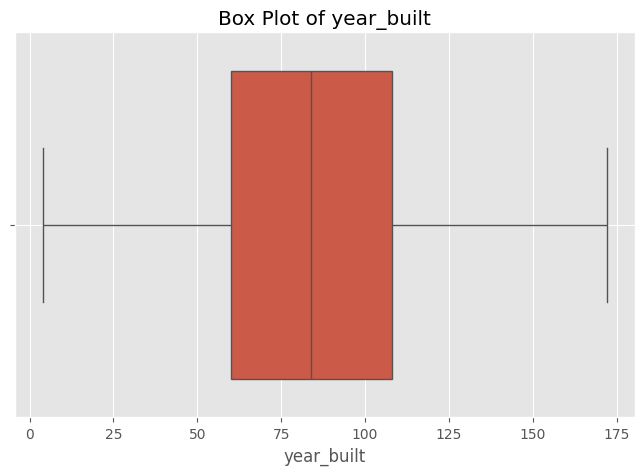

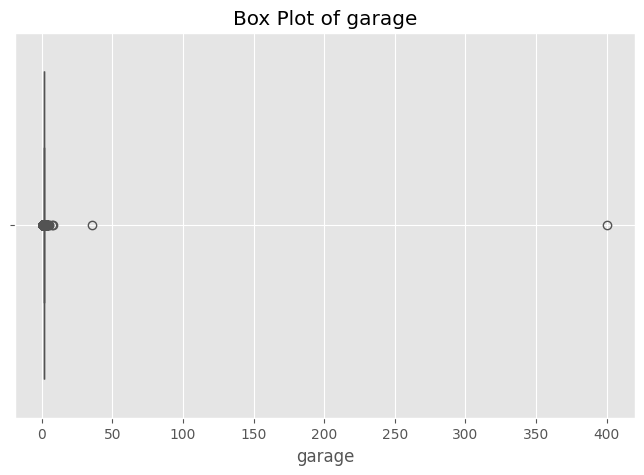

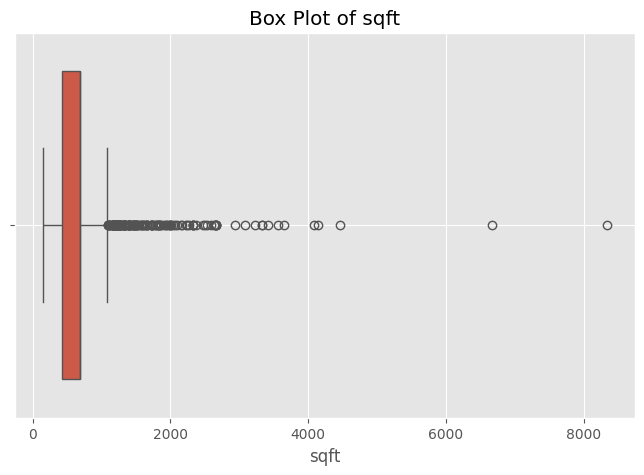

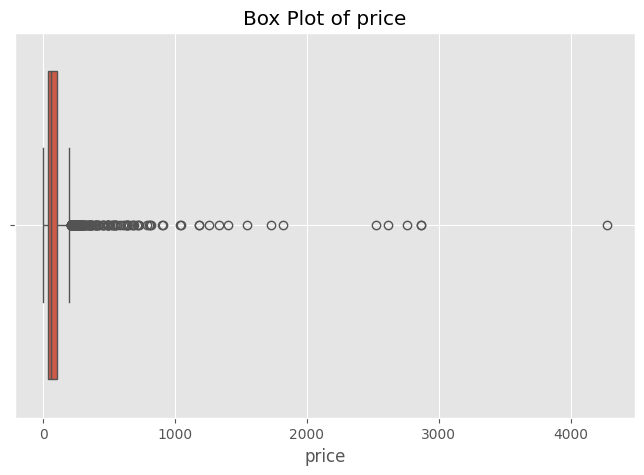

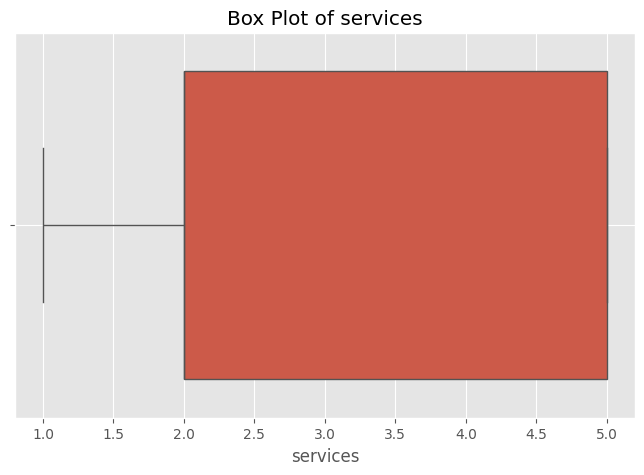

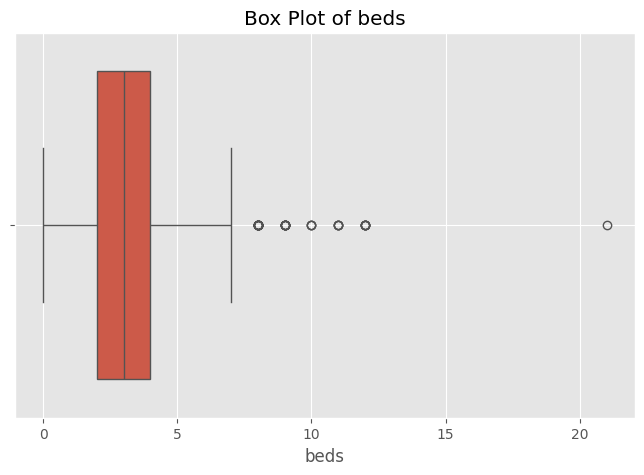

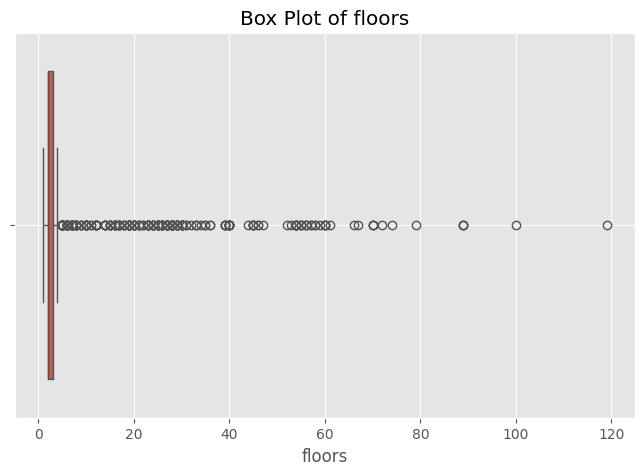

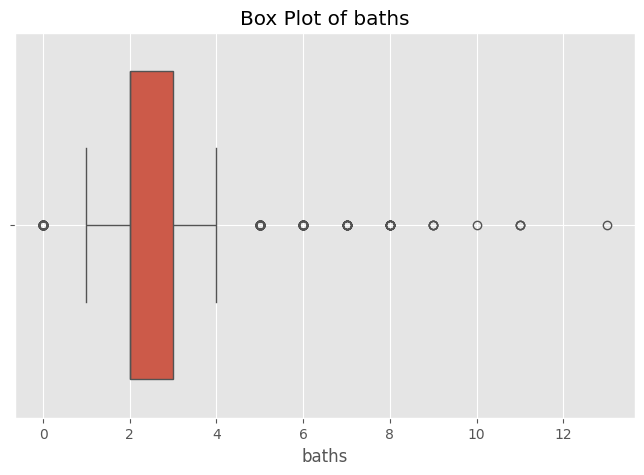

In [1648]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.grid(True)
  plt.show()

In [1649]:

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outlier_summary = []
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)[col]
    outlier_count = outliers.count()
    outlier_pct = (outlier_count / df.shape[0]) * 100

    outlier_summary.append({
        'Column': col,
        'Number of Outliers': outlier_count,
        'Outlier %': round(outlier_pct, 2)
    })
outlier_table = pd.DataFrame(outlier_summary).sort_values(by='Outlier %', ascending=False).reset_index(drop=True)
outlier_table[outlier_table['Outlier %'] > 0]

,Column,Number of Outliers,Outlier %
0,garage,417,26.21
1,floors,286,17.98
2,baths,176,11.06
3,sqft,151,9.49
4,price,139,8.74
5,beds,42,2.64


In [1650]:
def cap_values(series, lower=None, upper=None):
    if lower is not None:
        series = np.where(series < lower, lower, series)
    if upper is not None:
        series = np.where(series > upper, upper, series)
    return series

df = df[df['sqft'] <= df['sqft'].quantile(0.95)]
df = df[df['beds'] < 7]
df = df[df['baths'] < 7]
df = df[df['price'] <= df['price'].quantile(0.99)]
df['garage'] = cap_values(df['garage'], upper=df['garage'].quantile(0.95))

df['floors'] = cap_values(df['floors'], upper=df['floors'].quantile(0.90))

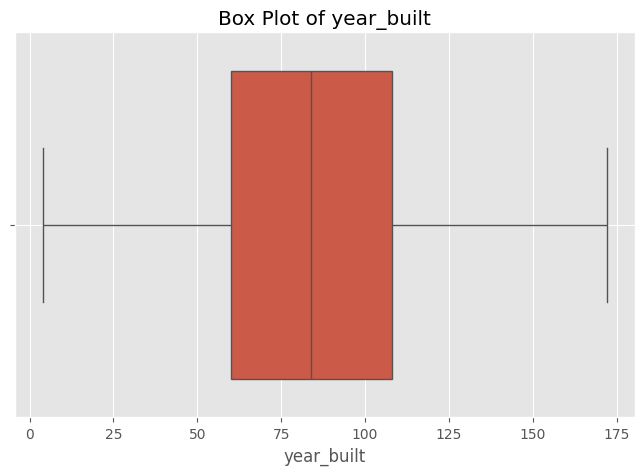

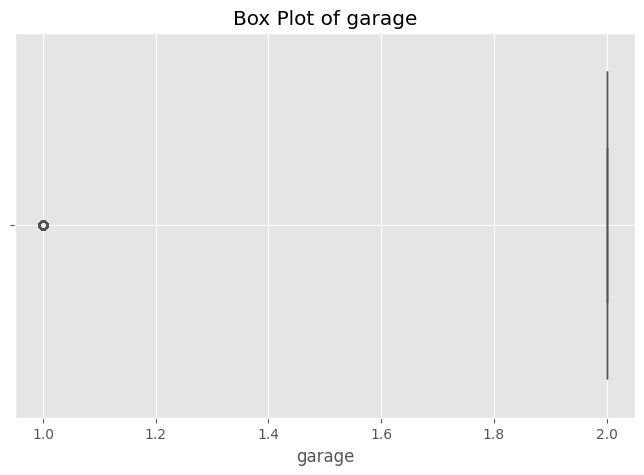

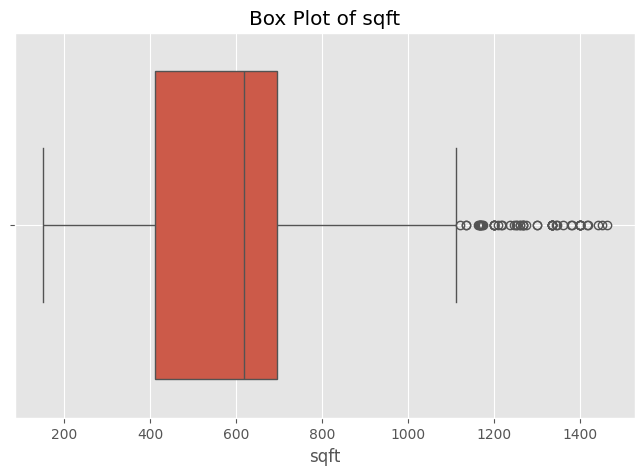

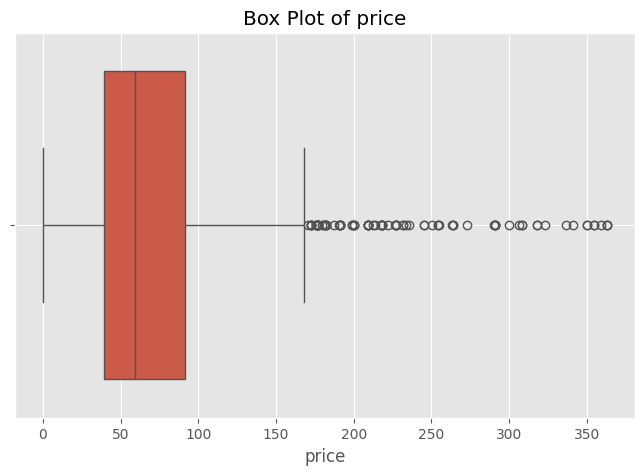

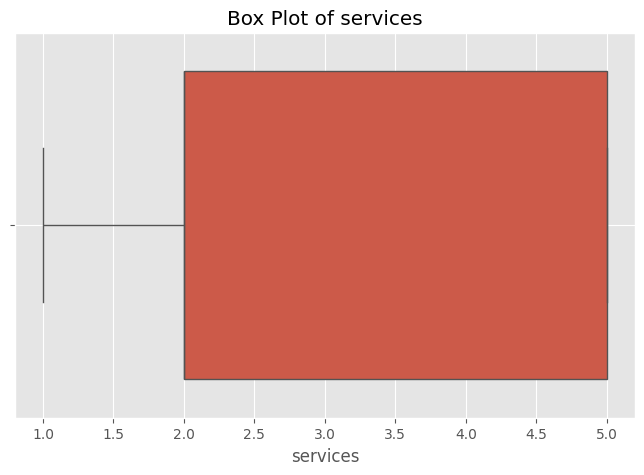

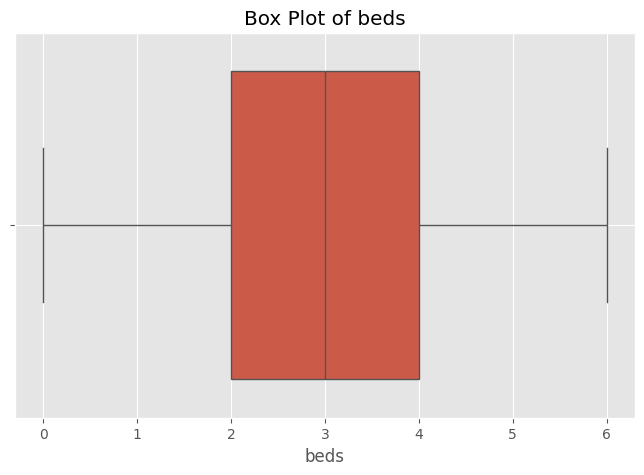

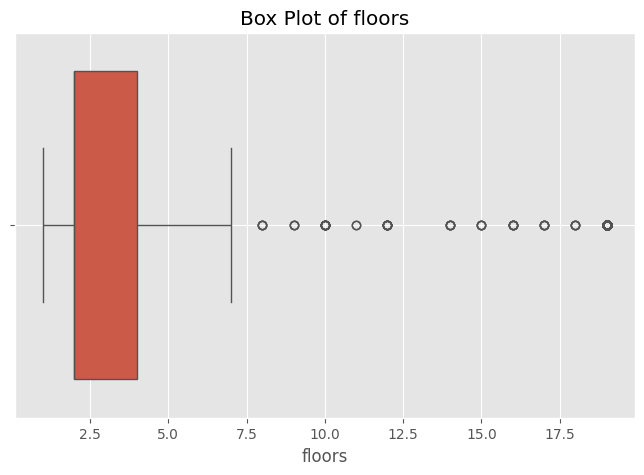

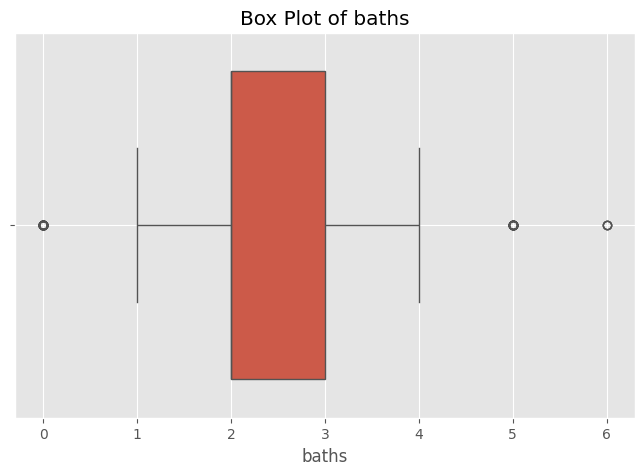

In [1651]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.grid(True)
  plt.show()

In [1652]:
df = df[df['sqft'] <= df['sqft'].quantile(0.95)]

df = df[df['price'] <= df['price'].quantile(0.99)]


## Split Data

In [1653]:
X = df.drop('price',axis=1)
y= df['price']

### Train Test Split

In [1654]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =42)
print("X_train ; ",X_train.shape)
print("X_train ; ",X_test.shape)

X_train ;  (1083, 9)
X_train ;  (271, 9)


## Encoding

In [1655]:

ordinal = OrdinalEncoder()
X_train['type'] = ordinal.fit_transform(X_train[['type']])
X_test['type'] = ordinal.transform(X_test[['type']])
df2['type'] = ordinal.fit_transform(df2[['type']])

## Scaling

In [1656]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df2_scaled = scaler.transform(df2)

X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
df2_scaled = pd.DataFrame(df2_scaled,columns = df2.columns)

# Modeling

In [1657]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [1658]:
lr.coef_

array([-4.71958306, -4.32668558,  8.60903374, -1.3389983 , 14.15190447,
        0.14686766, -1.7333395 , -2.50637602, 16.46074011])

In [1659]:
lr.intercept_

np.float64(66.92784306923636)

In [1660]:
y_train_hat = lr.predict(X_train_scaled)
mse_lr = mse(y_train_hat, y_train)
mse_lr

884.9800765608483

# Evalution

In [1661]:
y_pred = lr.predict(X_test_scaled)
mse_lr = mse(y_pred, y_test)
mse_lr

680.6463616949949

In [1662]:
np.sqrt(mse_lr)

np.float64(26.089200096879072)

In [1663]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred, y_test)
print("MAE:", mae)

MAE: 19.17590118842886


In [1664]:
r2 = r2_score(y_test, y_pred)

print(f"R2 Score (Model Regresi): {r2:.4f}")

R2 Score (Model Regresi): 0.5886


In [1665]:
y_hat_test = lr.predict(df2_scaled)
pd.DataFrame(y_hat_test).to_csv('submission.csv', index = False) # save csv-file to root/submission.csv